[6.26999203]
[[ 1.16579111e-02 -2.17460784e-02]
 [ 3.92241472e-01 -1.41650015e+00]
 [ 1.89189714e+01 -2.22967312e+01]
 [ 4.52093534e+00 -8.98183087e+00]
 [ 3.83826196e-01 -1.76230408e+00]
 [-2.88928878e-01  1.32867956e-01]
 [ 4.95238400e+00 -2.79436297e+00]
 [-8.99372669e-01  6.83956772e-02]]
[ 8.17321842  5.12282877  1.93513132 -6.31691267  6.86361599 -7.30366593
  3.34509254  7.75497247  9.95604821]
[[-3.41191498e+00  1.60558879e+00]
 [-1.57503844e+00  9.22949104e-04]
 [-4.99169303e-01 -1.60640637e-01]
 [ 1.33557824e+00 -4.63139972e-01]
 [-2.18511141e+00  4.25712184e-01]
 [ 1.61655154e+00 -1.00795248e+00]
 [ 1.35035988e+00  2.41397359e+00]
 [-2.10009281e+00  1.32946469e+00]]
[-0.12661276 -0.36658386 -3.81113556 -3.92880498 -0.79800022  0.30019882
 -1.14102257  1.40545472 -0.48208519]
 
[5.29724741]
[[ 1.18616834e-02 -2.06743314e-02]
 [ 3.58306936e-01 -1.30363362e+00]
 [ 1.49117378e+01 -1.89798881e+01]
 [ 4.24331747e+00 -8.17269860e+00]
 [ 3.56742209e-01 -1.62623294e+00]
 [-2.85616465

[2.12530385]
[[ 0.01339713 -0.00431705]
 [ 0.12257058 -0.39233112]
 [ 1.15621164 -1.34531735]
 [ 2.60693127 -1.68996325]
 [ 0.16960461 -0.55419769]
 [-0.27395083 -0.10630364]
 [-0.92737627  0.49557579]
 [-0.86646296 -0.475383  ]]
[ 0.21581517 -0.78293363 -1.26294499  0.63315265 -0.24257834  0.35157788
  1.63958469 -0.12493036  2.4035475 ]
[[-3.35125558  1.57713956]
 [-1.55064255  0.01412818]
 [-0.57618482 -0.02793731]
 [ 1.25527814 -0.38000695]
 [-2.15035874  0.43530982]
 [ 1.59267156 -0.98958444]
 [ 1.31826575  2.37630181]
 [-2.04742285  1.31065987]]
[-0.16280744 -0.36877682 -3.73208836 -3.84137057 -0.80906262  0.32155077
 -1.16700562  1.34829417 -0.55561951]
 
[2.10348709]
[[ 0.01341608 -0.00403142]
 [ 0.11990436 -0.38027528]
 [ 1.12537158 -1.19286642]
 [ 2.59153866 -1.59973886]
 [ 0.16741587 -0.53994298]
 [-0.27334475 -0.10897544]
 [-0.9356964   0.50351614]
 [-0.86801218 -0.48292194]]
[ 0.19472693 -0.78199141 -1.25124818  0.6428308  -0.25438145  0.36962078
  1.58220692 -0.14594318  

  0.9740607  -0.21951455  1.88334704]
[[-3.31142668  1.55835251]
 [-1.53341744  0.01781849]
 [-0.5816692  -0.02120116]
 [ 1.21030341 -0.36150183]
 [-2.12656949  0.43575471]
 [ 1.5768632  -0.9763518 ]
 [ 1.31361227  2.34176471]
 [-2.01257643  1.30117908]]
[-0.16255105 -0.35564979 -3.6737902  -3.80319245 -0.79625768  0.31286803
 -1.16843222  1.33457652 -0.57411411]
 
[1.83633173]
[[ 1.34760841e-02 -1.40079805e-03]
 [ 9.27117470e-02 -2.61575342e-01]
 [ 9.70738444e-01  1.05774216e-01]
 [ 2.41714809e+00 -7.04000427e-01]
 [ 1.44488600e-01 -3.99509076e-01]
 [-2.58254690e-01 -1.27410886e-01]
 [-8.77317477e-01  5.12684579e-01]
 [-8.72966380e-01 -5.47574468e-01]]
[ 0.12036016 -0.63865475 -1.00992457  0.60295125 -0.23747538  0.40457731
  0.94656457 -0.21804744  1.86730095]
[[-3.30895322  1.55718487]
 [-1.5323378   0.01800488]
 [-0.58196372 -0.02123285]
 [ 1.20757601 -0.36067583]
 [-2.1250837   0.43573173]
 [ 1.57587511 -0.97552416]
 [ 1.3132908   2.33962219]
 [-2.01041178  1.30061252]]
[-0.162518

[1.54010976]
[[ 1.30927559e-02 -5.47787916e-04]
 [ 7.13620246e-02 -1.88895219e-01]
 [ 8.31258144e-01  5.53967033e-01]
 [ 2.19652490e+00 -1.80267318e-01]
 [ 1.25066733e-01 -3.15515102e-01]
 [-2.25996229e-01 -1.18443917e-01]
 [-6.99252486e-01  4.48389674e-01]
 [-8.32669945e-01 -5.47500693e-01]]
[ 0.1530651  -0.46803926 -0.7573189   0.49167009 -0.14893977  0.31955534
  0.53407643 -0.17401635  1.67294081]
[[-3.24771305  1.52826412]
 [-1.50537693  0.0217766 ]
 [-0.58811104 -0.02812544]
 [ 1.14219409 -0.34642593]
 [-2.08809209  0.4341808 ]
 [ 1.55110747 -0.95507682]
 [ 1.30351963  2.28719917]
 [-1.95713554  1.28672368]]
[-0.16207034 -0.33818869 -3.58583068 -3.74024774 -0.77719879  0.29981706
 -1.15982915  1.31258397 -0.59693073]
 
[1.52982411]
[[ 1.30717120e-02 -5.47426449e-04]
 [ 7.07036095e-02 -1.87080976e-01]
 [ 8.23627488e-01  5.58656496e-01]
 [ 2.18757307e+00 -1.68340353e-01]
 [ 1.24436765e-01 -3.13480475e-01]
 [-2.24674858e-01 -1.17765327e-01]
 [-6.93258312e-01  4.46012341e-01]
 [-8.30

[1.34283989]
[[ 1.26079586e-02 -7.70035533e-04]
 [ 5.91109529e-02 -1.58522478e-01]
 [ 6.59312250e-01  5.76838259e-01]
 [ 2.00496876e+00  3.44018540e-03]
 [ 1.12959205e-01 -2.81953563e-01]
 [-1.99097181e-01 -1.02926070e-01]
 [-5.88322883e-01  4.03034840e-01]
 [-7.81504861e-01 -5.16236995e-01]]
[ 0.15563234 -0.40408591 -0.63925874  0.44748838 -0.12278758  0.27692798
  0.38529557 -0.15766069  1.62604402]
[[-3.19714454  1.50438332]
 [-1.48286447  0.02414415]
 [-0.59064984 -0.03668464]
 [ 1.09142247 -0.3397222 ]
 [-2.05731212  0.43205385]
 [ 1.53018927 -0.93840858]
 [ 1.29320794  2.24478554]
 [-1.91389623  1.27495225]]
[-0.16197083 -0.32611686 -3.5188848  -3.68910022 -0.76295172  0.2904798
 -1.1488158   1.29464429 -0.61334731]
 
[1.33434799]
[[ 1.25832707e-02 -7.88940632e-04]
 [ 5.85939741e-02 -1.57372267e-01]
 [ 6.50920483e-01  5.75382843e-01]
 [ 1.99568718e+00  9.58726096e-03]
 [ 1.12428922e-01 -2.80699319e-01]
 [-1.97874476e-01 -1.02162753e-01]
 [-5.83690762e-01  4.01082814e-01]
 [-7.789

[1.17941538]
[[ 1.20753303e-02 -1.23865935e-03]
 [ 4.91601608e-02 -1.37572688e-01]
 [ 4.88889637e-01  5.27876935e-01]
 [ 1.80836458e+00  1.03460895e-01]
 [ 1.02435970e-01 -2.59097855e-01]
 [-1.74780053e-01 -8.73255313e-02]
 [-4.99777263e-01  3.64968474e-01]
 [-7.26247699e-01 -4.76826895e-01]]
[ 0.14756359 -0.36712405 -0.55707455  0.41952095 -0.11396481  0.24861995
  0.29789463 -0.15032479  1.60198516]
[[-3.14735854  1.48088153]
 [-1.46053113  0.02608062]
 [-0.59043157 -0.04480258]
 [ 1.0444822  -0.33528319]
 [-2.02683703  0.42952848]
 [ 1.50919577 -0.92224792]
 [ 1.28150574  2.20368529]
 [-1.87217124  1.26280253]]
[-0.16181887 -0.31499852 -3.45452744 -3.63820634 -0.74918385  0.28183327
 -1.1361786   1.27680963 -0.62898642]
 
[1.17236458]
[[ 1.20495130e-02 -1.26338116e-03]
 [ 4.87283659e-02 -1.36707122e-01]
 [ 4.81215256e-01  5.24982704e-01]
 [ 1.79895339e+00  1.07010865e-01]
 [ 1.01963224e-01 -2.58146889e-01]
 [-1.73695294e-01 -8.66166836e-02]
 [-4.95953847e-01  3.63289136e-01]
 [-7.23

[1.03196935]
[[ 0.01148163 -0.00182036]
 [ 0.04002668 -0.11962532]
 [ 0.32607358  0.45913268]
 [ 1.59273275  0.16685307]
 [ 0.09210998 -0.23904459]
 [-0.15151233 -0.07209316]
 [-0.41874084  0.32872174]
 [-0.66600528 -0.43191653]]
[ 0.13498789 -0.33868972 -0.48754061  0.39435462 -0.1111286   0.2254647
  0.23257082 -0.14540136  1.579995  ]
[[-3.09371388  1.45557191]
 [-1.43630754  0.02783546]
 [-0.58731609 -0.05250518]
 [ 0.99744798 -0.3318869 ]
 [-1.99382722  0.42644331]
 [ 1.48617009 -0.905104  ]
 [ 1.2674471   2.16004384]
 [-1.82821341  1.24898661]]
[-0.16147441 -0.30357309 -3.38648857 -3.58292926 -0.7344456   0.27295666
 -1.12126977  1.2574945  -0.64545259]
 
[1.02621059]
[[ 0.01145602 -0.0018456 ]
 [ 0.03966467 -0.11892195]
 [ 0.3196808   0.45617272]
 [ 1.58344511  0.1688963 ]
 [ 0.09168557 -0.23823943]
 [-0.15057893 -0.07148453]
 [-0.41550892  0.32724665]
 [-0.66343816 -0.42998547]]
[ 0.13440908 -0.33760923 -0.48484931  0.39330944 -0.11107868  0.22458375
  0.23017226 -0.14521808  1

 -1.1063382   1.23925894 -0.6605767 ]
 
[0.91148849]
[[ 0.01090424 -0.00238058]
 [ 0.03235452 -0.10462336]
 [ 0.19391396  0.39456312]
 [ 1.38292682  0.20342496]
 [ 0.08283093 -0.22140623]
 [-0.13160255 -0.05925602]
 [-0.34944438  0.29655185]
 [-0.60868716 -0.38874457]]
[ 0.12149616 -0.31587731 -0.43096443  0.37078373 -0.11071426  0.20727145
  0.18382686 -0.14156465  1.55604002]
[[-3.04097694  1.43070517]
 [-1.4123545   0.02927943]
 [-0.58171794 -0.0589206 ]
 [ 0.9548685  -0.32939219]
 [-1.96121425  0.42309008]
 [ 1.46316822 -0.88849448]
 [ 1.25234395  2.11773401]
 [-1.78601711  1.23464942]]
[-0.16091087 -0.29277772 -3.32068935 -3.52818307 -0.71998439  0.26458465
 -1.10564772  1.23843578 -0.66124913]
 
[0.90677981]
[[ 0.01087982 -0.00240365]
 [ 0.03205041 -0.10402002]
 [ 0.18886436  0.3919506 ]
 [ 1.3740286   0.20459973]
 [ 0.0824499  -0.22067352]
 [-0.13080827 -0.05875229]
 [-0.34665135  0.29523019]
 [-0.60628802 -0.38693963]]
[ 0.12090735 -0.31496508 -0.42873103  0.36977677 -0.1107203

[0.81288388]
[[ 0.01036214 -0.00287511]
 [ 0.02592484 -0.09157353]
 [ 0.09165752  0.33900577]
 [ 1.18458826  0.22430303]
 [ 0.07452487 -0.20506532]
 [-0.1147243  -0.04875935]
 [-0.28921577  0.26757678]
 [-0.5558196  -0.34915508]]
[ 0.10806398 -0.2961148  -0.38356951  0.34798896 -0.11109095  0.19278458
  0.14532391 -0.13845143  1.52859078]
[[-2.98913264  1.40627295]
 [-1.38869045  0.03045899]
 [-0.57420341 -0.06419349]
 [ 0.91651999 -0.32742525]
 [-1.92900853  0.41950405]
 [ 1.44024465 -0.87236929]
 [ 1.23639087  2.07667129]
 [-1.74548842  1.21984648]]
[-0.16012591 -0.2825302  -3.25690481 -3.4739767  -0.70576994  0.25663559
 -1.08954889  1.21964341 -0.67633743]
 
[0.80902487]
[[ 0.01033959 -0.00289475]
 [ 0.02567089 -0.091042  ]
 [ 0.08784399  0.3368033 ]
 [ 1.17629647  0.22496792]
 [ 0.07418516 -0.20437607]
 [-0.11405361 -0.04835277]
 [-0.28677593  0.266381  ]
 [-0.55363653 -0.34753152]]
[ 0.10748727 -0.2953068  -0.38168345  0.34701743 -0.11111492  0.19222833
  0.14382919 -0.13833379  

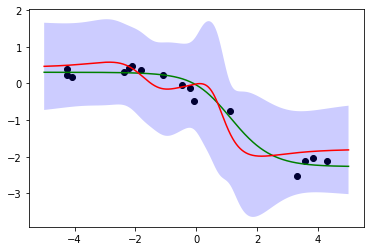

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

fig = plt.figure()
dataAreaMax = 5.0
dataAreaMin = -5.0

trainDataNum = 16
trainSigmaW2 = 1.0
trainSigmaY2 = 0.09
trainHiddenLayerNum = 5

learningSigmaW2 = 4.0
learningSigmaY2 = 1.0
learningHiddenLayerNum = 8
learningAlfa = 0.003
errorMax = 0.8

class NN:
    def __init__(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2

    def setX(self, x):
        self.z0 = np.array([x, 1])
        self.a1 = self.z0.dot(self.wh1.T)
        hiddenTmp = tanh(self.a1)
        self.z1 = np.append(hiddenTmp, 1.0)
        self.a2 = self.wh2.dot(self.z1)
    
    def updateWeight(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2


    def getZ0data(self):
        return self.z0
    
    def getA1data(self):
        return self.a1
    
    def getZ1data(self):
        return self.z1
    
    def getA2data(self):
        return self.a2
    
    def getDA(self):
        dA2 = self.z1
        dA1 = np.outer(self.wh2[0:-1] * (1 - self.z1[0:-1]**2), self.z0)
        return np.concatenate([dA2, np.concatenate(dA1)])

# Create train data
# Select weights
trainWh1 = []
for i in range(trainHiddenLayerNum):
    trainWh1.append(np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = 2))
trainWh1 = np.array(trainWh1)
trainWh2 = np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = trainHiddenLayerNum + 1)
#print(trainWh1)

# Select x data
trainXs = np.random.rand(trainDataNum) * (dataAreaMax - dataAreaMin) + dataAreaMin
#print(trainXs)

# Create y data
trainNN = NN(trainWh1, trainWh2)
trainYs = []
for x in trainXs:
    trainNN.setX(x)
    trainYs.append(trainNN.getA2data() + np.random.normal(loc = 0.0, scale = np.sqrt(trainSigmaY2), size = 1))

# Create a line
originalXs = np.linspace(dataAreaMin, dataAreaMax, 1000)
originalYs = []
for x in originalXs:
    trainNN.setX(x)    
    originalYs.append(trainNN.getA2data())
    
#Learing
#initialize data
learningWh1 = []
for i in range(learningHiddenLayerNum):
    learningWh1.append(np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = 2))
learningWh1 = np.array(learningWh1)
learningWh2 = np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = learningHiddenLayerNum + 1)

learningNN = NN(learningWh1, learningWh2)

# back propagation
while True:
    ew = 0.0
    dEw2 = np.zeros([1, learningHiddenLayerNum + 1])[0]
    dEw1 = np.zeros([learningHiddenLayerNum, 2])

    for x, y in zip(trainXs, trainYs):
        learningNN.setX(x)
        delta2 = learningNN.getA2data() - y
        delta1 = delta2 * learningWh2[0:-1] * (1 - learningNN.getZ1data()[0:-1]**2)
        dEw2 += delta2 * learningNN.getZ1data()
        dEw1 += np.outer(delta1, learningNN.getZ0data())
        ew += 0.5 * delta2**2
        #print(" ", delta1)
        
    print(ew)
    print(dEw1)
    print(dEw2)
    print(learningWh1)
    print(learningWh2)    
    print(" ")
    
    if ew < errorMax:
        break
    
    # update weights
    # These equations are almost the same with those of NN with regularization
    learningWh1 = (1 - learningAlfa / learningSigmaW2)*learningWh1 - learningAlfa / learningSigmaW2 * dEw1
    learningWh2 = (1 - learningAlfa / learningSigmaW2)*learningWh2 - learningAlfa / learningSigmaW2 * dEw2
    learningNN.updateWeight(learningWh1, learningWh2)

# For debug
#    break

# Calculate Hessian
lambdaWMap = (1 / learningSigmaW2) * np.eye(learningHiddenLayerNum + 1 + learningHiddenLayerNum * 2)
for x in trainXs:
    learningNN.setX(x)
    dA = learningNN.getDA()
    lambdaWMap += (1/learningSigmaY2) * np.outer(dA, dA)
    
# Create estimated data
upperPredictedYs = []
lowerPredictedYs = []
mapYs = []
lambdaInv = np.linalg.inv(lambdaWMap)

calValNN = NN(learningWh1, learningWh2)
for x in originalXs:
    calValNN.setX(x)
    # Calculate g
    g = calValNN.getDA()
    
    sigmaX = np.sqrt(learningSigmaY2 + g.dot(lambdaInv.dot(g)))

    upperPredictedYs.append(calValNN.getA2data() + sigmaX)
    lowerPredictedYs.append(calValNN.getA2data() - sigmaX)
    mapYs.append(calValNN.getA2data())
    
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainXs, trainYs, color = "black")
plt.plot(originalXs, originalYs, color = "green")
plt.plot(originalXs, mapYs, color = "red")
ax.fill_between(originalXs, upperPredictedYs, lowerPredictedYs, facecolor='blue', alpha=0.2)

plt.show()